# Plots erstellen

Mit dem [Plots-Paket](https://docs.juliaplots.org/stable) lassen sich eine Vielzahl verschiedener Plots erstellen, 
[hier](https://docs.juliaplots.org/stable/gallery/gr/) eine Sammlung von Beispielen. 

Wie immer muss die Bibliothek importiert werden, leider kann das beim ersten Mal innerhalb einer Julia Sitzung eine ganze Weile dauern.

In [2]:
using Plots

## Linienplots

Linienplots erstellt man mit der Funktion `plot`, im einfachsten Fall werden zwei Arrays übergeben, in denen
$x$-Koordinaten und $y$-Koordinaten stehen. Die `plot`-Funktion verbindet diese Punkte, so dass ein Polygonzug entsteht. 

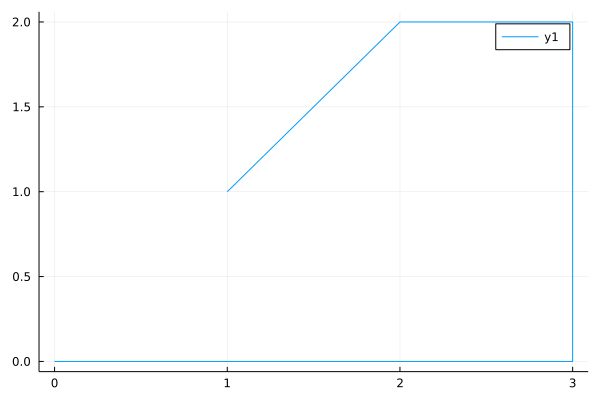

In [2]:
plot([0, 3, 3, 2, 1], [0, 0, 2, 2, 1])

Die `plot`-Funktion akzeptiert auch Funktionen als Parameter, typischerweise werden zusätzlich noch die Grenzen des Plotbereichs übergeben.

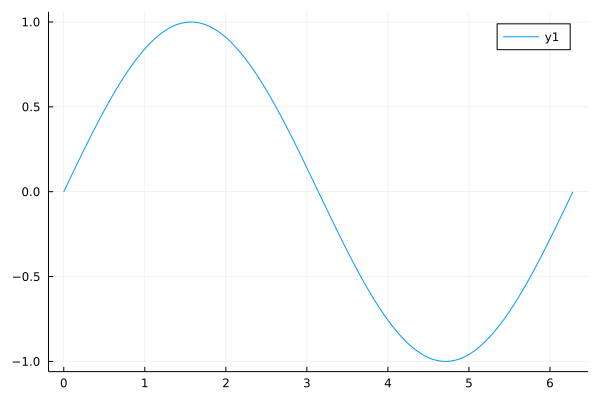

In [3]:
plot(sin, 0, 2π)

Das funktioniert auch für selbstdefinierte Funktionen

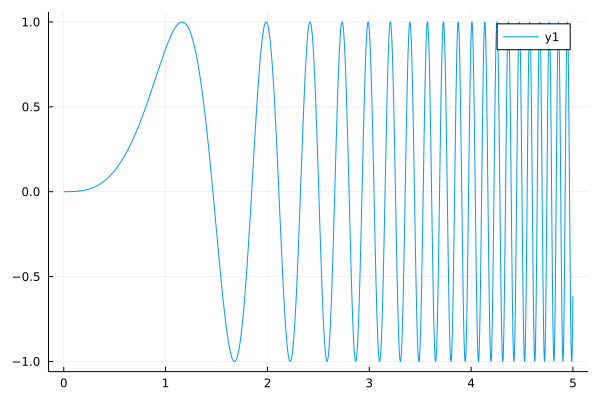

In [4]:
f(x) = sin(x^3)
plot(f, 0, 5)

Um mehrere Datensätze zu plotten werden die y-Werte in einem Array zusammengefasst.

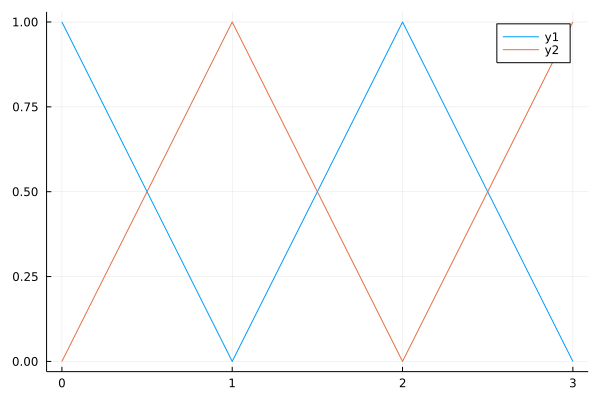

In [5]:
x = 0:3
y1 = [1, 0, 1, 0]
y2 = [0, 1, 0, 1]
plot(x, [y1, y2])


Mehrere Funktionen werden auch wieder in einem Array übergeben:

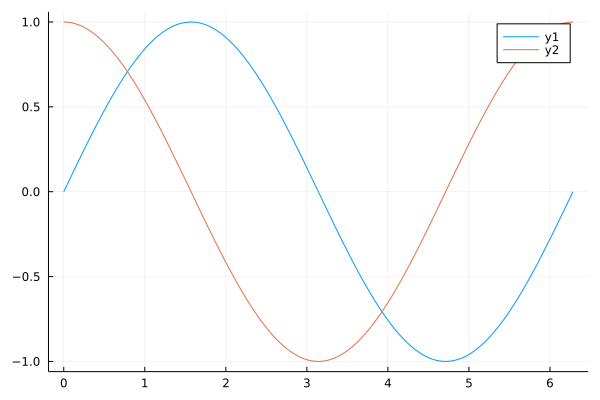

In [6]:
plot([sin, cos], 0, 2π)

### Plots beschriften

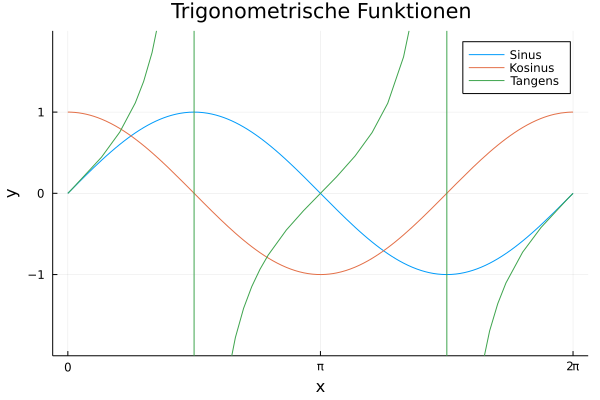

In [7]:
plot(
    [sin, cos, tan], 
    0, 2π, 
    title = "Trigonometrische Funktionen", 
    labels = ["Sinus" "Kosinus" "Tangens"],
    xlabel = "x", ylabel = "y", 
    xticks = (0:π:2π, ["0", "\\pi", "2\\pi"]),
    yrange = [-2, 2],
    yticks = [-1, 0, 1]
)

Plots lassen sich auch Schritt für Schritt erzeugen, dazu wird nach dem ersten plot die Funktion `plot!` verwendet.

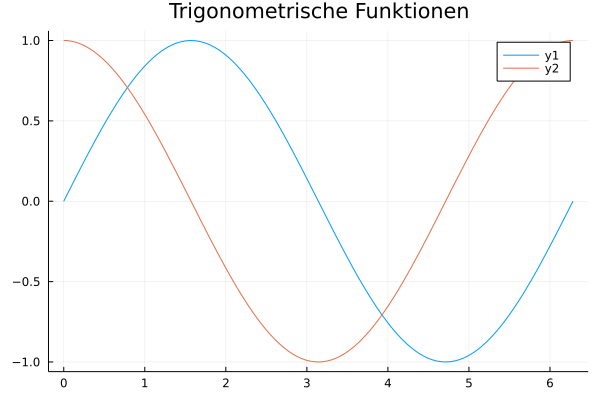

In [8]:
plot(sin, 0, 2π)
plot!(cos, 0, 2π)
plot!(title = "Trigonometrische Funktionen")

### In einer Schleife plotten

Sollen plots in einer Schleife erzeugt werden, dann geht das wie erwartet mit `plot!`. Allerdings muss am Ende noch dazu gesagt werden, dass der Plot angezeigt werden soll.

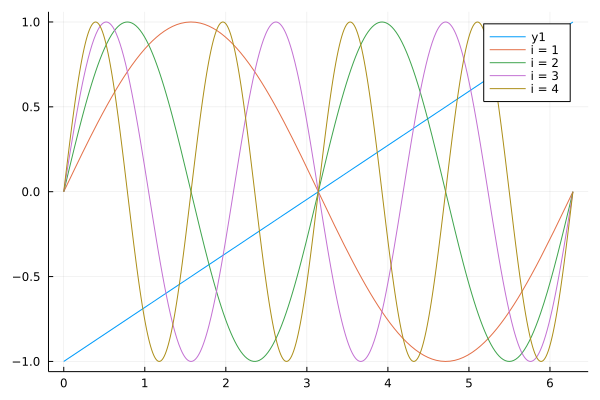

In [9]:
plot(x -> -1 + x / π, 0, 2π)
for i in 1:4
    plot!(x -> sin(i * x), 0, 2π, label = "i = $i")
end
current()

### Exkurs: Manipulate

Mit `manipulate` aus dem `Interact` Paket lassen sich interaktive Plots erstellen. Leider habe ich es bei mir nicht ans Laufen bekommen...

Laut https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/ sollte es damit

```
using Conda
Conda.pip_interop(true)
Conda.pip("install", "webio_jupyter_extension")
```

funktionieren, hat es aber nicht.

In [12]:
using Interact

@manipulate for a = -1:0.1:1
    plot(x -> sin(a*x), 0, 2π)
end

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/maba/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/maba/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/maba/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/maba/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/maba/.julia/packages/Interact/pVyN2/src/../assets/bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013490e850, Task (runnable) @0x000000013490e850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"11312752295907449590\",\"id\":\"16272943143455870094\",\"type\":\"observable\"}),\"index\"